## Oblig 7 - Unsupervised Learning


1. Using the UCI mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataet. Note that this may not be necessarily two (edible V non-edible)

2. Plot the metric while increasing the number of clusters. e.g, k=2..30


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA


# from sklearn.datasets.samples_generator import make_blobs


In [4]:
# import mushrooms dataset
mushrooms = pd.read_csv('agaricus-lepiota.csv')

mushrooms.head()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


optimal number of clusters:  6


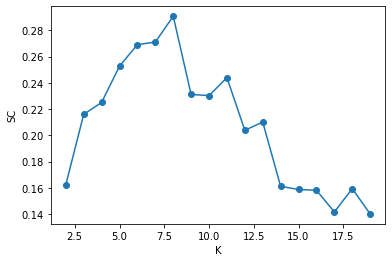

In [5]:

X = pd.get_dummies(mushrooms.drop('edibility', axis='columns'))

ssd = []
sc = []  # Sillhouette Coefficient, mean nearest-cluster distance

k = range(2, 20)  # (2,20) instead of (2,30)...time consuming to run every time


for n in k:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    sc.append(metrics.silhouette_score(
        X.values, kmeans.labels_, metric='euclidean'))

#y_kmeans = kmeans.predict(X)

# plt.xlabel('K')
# plt.ylabel('SSD')
#plt.plot(k, ssd)
# plt.figure(2)
plt.xlabel('K')
plt.ylabel('SC')
plt.plot(k, sc, marker='o')

optimal_n_cluster = np.argmax(sc)

print("optimal number of clusters: ", optimal_n_cluster)


# plt.scatter(X[:,0], X[:,1], c = y_kmeans, s=50, cmap='viridis')


3. Visualise the data using the number of clusters and a suitable projection or low-dimentional enbedding.


In [6]:
optimal = sorted(sc)[-5:]
plt.subplots_adjust(top=0.8, bottom=0.01, hspace=0.6, wspace=0.8)

access = map(lambda item: sc.index(item), optimal)

n_best_k = list(access)[::-1]

print(n_best_k)


[6, 5, 4, 3, 9]


<Figure size 432x288 with 0 Axes>

In [7]:
pca = PCA()
pca.fit(X)

pca = PCA(n_components=20)
df_pca = pca.fit_transform(X)


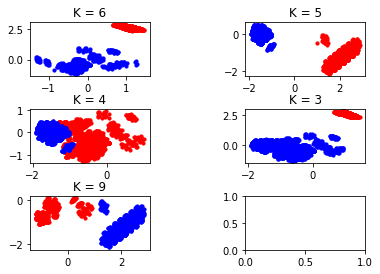

In [8]:
figure, axs = plt.subplots(3, 2)
plt.subplots_adjust(top=0.8, bottom=0.01, hspace=0.6, wspace=0.8)

for i, k in enumerate(n_best_k):
    x = int(i/2)
    y = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++')
    Ypreds = kmeans.fit_predict(df_pca)

    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(df_pca[Ypreds == 0, 0],
                      df_pca[Ypreds == 0, 1], s=10, c='red')
    axs[x, y].scatter(df_pca[Ypreds == 1, 0],
                      df_pca[Ypreds == 1, 1], s=10, c='blue')

plt.show()
